#MILESTONE 1

#IMPORT DICTIONARY

In [ ]:
import pandas as pd
import gdown
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer# For feature scaling
from sklearn.cluster import KMeans # K-means clustering
from yellowbrick.cluster import SilhouetteVisualizer # Untuk melakukan analisis siluet untuk k-means clustering


#IMPORT CSV INTO GOOGLE COLLAB

In [ ]:
potter_url = 'https://drive.google.com/file/d/1yZ4LCxiXWzJ8C-4lHHEyQ9vtRd0DxblC/view'
potter = 'https://drive.google.com/uc?id='+ potter_url.split('/')[-2]

cc_performance = pd.read_csv(potter)
cc_performance

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
0,100000006,X,A,91.0,0,25000.0,1,25000.0,26,5,1996-11-03
1,100000038,X,A,69.0,0,9000.0,5,10000.0,25,10,1971-04-24
2,100000382,X,A,123.0,1,17330.0,6,20000.0,18,6,1953-01-16
3,100000612,X,A,84.0,1,25830.0,6,25000.0,14,7,1997-06-07
4,100000757,X,A,40.0,0,25000.0,3,25000.0,17,5,1989-09-13
...,...,...,...,...,...,...,...,...,...,...,...
12482,101059900,Z,E,21.0,1,15000.0,1,15000.0,21,3,1970-05-27
12483,101059915,Z,E,19.0,0,20000.0,1,20000.0,19,4,1952-03-04
12484,101059935,Z,E,21.0,0,20000.0,1,20000.0,21,4,1981-10-23
12485,101059941,Z,E,17.0,0,20000.0,2,20000.0,17,6,1975-07-21


In [ ]:
cc_performance.head ()

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
0,100000006,X,A,91.0,0,25000.0,1,25000.0,26,5,1996-11-03
1,100000038,X,A,69.0,0,9000.0,5,10000.0,25,10,1971-04-24
2,100000382,X,A,123.0,1,17330.0,6,20000.0,18,6,1953-01-16
3,100000612,X,A,84.0,1,25830.0,6,25000.0,14,7,1997-06-07
4,100000757,X,A,40.0,0,25000.0,3,25000.0,17,5,1989-09-13


#CHECK DATA INFORMATION

In [ ]:
cc_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12487 entries, 0 to 12486
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_id               12487 non-null  int64  
 1   account_activity_level   12487 non-null  object 
 2   customer_value_level     12487 non-null  object 
 3   MOB                      12487 non-null  float64
 4   flag_female              12487 non-null  int64  
 5   avg_sales_L36M           11751 non-null  float64
 6   cnt_sales_L36M           12487 non-null  int64  
 7   last_sales               12487 non-null  float64
 8   month_since_last_sales   12487 non-null  int64  
 9   count_direct_promo_L12M  12487 non-null  int64  
 10  birth_date               12487 non-null  object 
dtypes: float64(3), int64(5), object(3)
memory usage: 1.0+ MB


Foundings :
 - There are total of 12487 rows on the dataset
 - Missing values in average sales column
 - Birth date data type is still "object". Change this to "datetime" later.
 - Account ID normally should be string

#CHECK POTENTIAL TYPOS & UNUSED DATA

In [ ]:
for column_name in cc_performance.columns:
  print(column_name)
  print(cc_performance[column_name].value_counts())
  print('\n')

account_id
100000006    1
100700791    1
100699591    1
100699624    1
100699637    1
            ..
100343448    1
100343468    1
100343797    1
100343837    1
101060006    1
Name: account_id, Length: 12487, dtype: int64


account_activity_level
X      8186
Z      3426
Y       874
XYZ       1
Name: account_activity_level, dtype: int64


customer_value_level
E    4452
B    2374
A    2196
C    1994
D    1470
F       1
Name: customer_value_level, dtype: int64


MOB
17.0     656
16.0     568
21.0     488
20.0     385
24.0     342
        ... 
283.0      1
151.0      1
232.0      1
143.0      1
154.0      1
Name: MOB, Length: 128, dtype: int64


flag_female
1    6759
0    5728
Name: flag_female, dtype: int64


avg_sales_L36M
25000.0    2043
20000.0    1732
10000.0    1690
15000.0    1422
5000.0      488
           ... 
10360.0       1
13330.0       1
5880.0        1
50000.0       1
18200.0       1
Name: avg_sales_L36M, Length: 277, dtype: int64


cnt_sales_L36M
1     3963
2     2656
3     

#CHECK MISSING VALUES

In [ ]:
cc_performance.isna().sum()

account_id                   0
account_activity_level       0
customer_value_level         0
MOB                          0
flag_female                  0
avg_sales_L36M             736
cnt_sales_L36M               0
last_sales                   0
month_since_last_sales       0
count_direct_promo_L12M      0
birth_date                   0
dtype: int64

#CHECK DUPLICATED VALUES

In [ ]:
cc_performance[cc_performance['account_id'].duplicated()]

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date


#DATA CLEANING STARTS HERE
copy the original table to undo if any mistakes occur on data cleaning process

In [ ]:
cc_performance_cleaning = cc_performance.copy()
cc_performance_cleaning

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
0,100000006,X,A,91.0,0,25000.0,1,25000.0,26,5,1996-11-03
1,100000038,X,A,69.0,0,9000.0,5,10000.0,25,10,1971-04-24
2,100000382,X,A,123.0,1,17330.0,6,20000.0,18,6,1953-01-16
3,100000612,X,A,84.0,1,25830.0,6,25000.0,14,7,1997-06-07
4,100000757,X,A,40.0,0,25000.0,3,25000.0,17,5,1989-09-13
...,...,...,...,...,...,...,...,...,...,...,...
12482,101059900,Z,E,21.0,1,15000.0,1,15000.0,21,3,1970-05-27
12483,101059915,Z,E,19.0,0,20000.0,1,20000.0,19,4,1952-03-04
12484,101059935,Z,E,21.0,0,20000.0,1,20000.0,21,4,1981-10-23
12485,101059941,Z,E,17.0,0,20000.0,2,20000.0,17,6,1975-07-21


#DROP DUPLICATES BASED ON ACCOUNT ID

In [ ]:
cc_performance_cleaning = cc_performance_cleaning.drop_duplicates(subset=['account_id'])
cc_performance_cleaning

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
0,100000006,X,A,91.0,0,25000.0,1,25000.0,26,5,1996-11-03
1,100000038,X,A,69.0,0,9000.0,5,10000.0,25,10,1971-04-24
2,100000382,X,A,123.0,1,17330.0,6,20000.0,18,6,1953-01-16
3,100000612,X,A,84.0,1,25830.0,6,25000.0,14,7,1997-06-07
4,100000757,X,A,40.0,0,25000.0,3,25000.0,17,5,1989-09-13
...,...,...,...,...,...,...,...,...,...,...,...
12482,101059900,Z,E,21.0,1,15000.0,1,15000.0,21,3,1970-05-27
12483,101059915,Z,E,19.0,0,20000.0,1,20000.0,19,4,1952-03-04
12484,101059935,Z,E,21.0,0,20000.0,1,20000.0,21,4,1981-10-23
12485,101059941,Z,E,17.0,0,20000.0,2,20000.0,17,6,1975-07-21


**As checked before, there are no duplicated values.**

#CHANGING BIRTH DATE TO DATE TIME

In [ ]:
cc_performance_cleaning['birth_date'] = pd.to_datetime(cc_performance_cleaning['birth_date'])
cc_performance_cleaning

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
0,100000006,X,A,91.0,0,25000.0,1,25000.0,26,5,1996-11-03
1,100000038,X,A,69.0,0,9000.0,5,10000.0,25,10,1971-04-24
2,100000382,X,A,123.0,1,17330.0,6,20000.0,18,6,1953-01-16
3,100000612,X,A,84.0,1,25830.0,6,25000.0,14,7,1997-06-07
4,100000757,X,A,40.0,0,25000.0,3,25000.0,17,5,1989-09-13
...,...,...,...,...,...,...,...,...,...,...,...
12482,101059900,Z,E,21.0,1,15000.0,1,15000.0,21,3,1970-05-27
12483,101059915,Z,E,19.0,0,20000.0,1,20000.0,19,4,1952-03-04
12484,101059935,Z,E,21.0,0,20000.0,1,20000.0,21,4,1981-10-23
12485,101059941,Z,E,17.0,0,20000.0,2,20000.0,17,6,1975-07-21


#CHANGING IDENTIFIER (ACCOUNT ID) TO STRING

In [ ]:
cc_performance_cleaning[['account_id']] = cc_performance_cleaning [['account_id']].astype(str)

In [ ]:
cc_performance_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12487 entries, 0 to 12486
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               12487 non-null  object        
 1   account_activity_level   12487 non-null  object        
 2   customer_value_level     12487 non-null  object        
 3   MOB                      12487 non-null  float64       
 4   flag_female              12487 non-null  int64         
 5   avg_sales_L36M           11751 non-null  float64       
 6   cnt_sales_L36M           12487 non-null  int64         
 7   last_sales               12487 non-null  float64       
 8   month_since_last_sales   12487 non-null  int64         
 9   count_direct_promo_L12M  12487 non-null  int64         
 10  birth_date               12487 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 1.4+ MB


#CHANGING COUNT DATA TO INTEGER. ON THIS TABLE, COUNT DATA CONSISTS :
- cnt_sales_L36M (already integer)
- count_direct_promo_L12M (already integer)
- MOB (currently float)
- month_since_last_sales (already integer)

In [ ]:
cc_performance_cleaning[['MOB']] = cc_performance_cleaning[['MOB']].astype(int)

In [ ]:
cc_performance_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12487 entries, 0 to 12486
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               12487 non-null  object        
 1   account_activity_level   12487 non-null  object        
 2   customer_value_level     12487 non-null  object        
 3   MOB                      12487 non-null  int64         
 4   flag_female              12487 non-null  int64         
 5   avg_sales_L36M           11751 non-null  float64       
 6   cnt_sales_L36M           12487 non-null  int64         
 7   last_sales               12487 non-null  float64       
 8   month_since_last_sales   12487 non-null  int64         
 9   count_direct_promo_L12M  12487 non-null  int64         
 10  birth_date               12487 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 1.4+ MB


#CHANGING ALL DATA RELATED TO MONEY TO FLOAT. ON THIS TABLE, MONEY DATA CONSISTS :
- avg_sales_L36M (already float)
- last_sales (already float)

**All data related to money already in float data type, so there is no need to make any change.**

#HANDLING MISSING VALUES

In [ ]:
cc_performance_cleaning_check = cc_performance_cleaning.copy()

In [ ]:
filtered_cc_performance_cleaning_check = cc_performance_cleaning_check[cc_performance_cleaning_check['avg_sales_L36M'].isna()]
filtered_cc_performance_cleaning_check

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
23,100002370,Z,A,110,0,NaN,0,15000.0,56,3,1972-08-18
26,100002547,X,A,61,0,NaN,0,15000.0,61,3,1987-07-24
37,100003731,X,A,54,1,NaN,0,15000.0,54,6,1954-03-30
59,100005474,Z,A,56,0,NaN,0,15000.0,56,2,1971-04-11
86,100008094,X,B,127,1,NaN,0,15000.0,53,3,1983-07-12
...,...,...,...,...,...,...,...,...,...,...,...
12420,101054957,Z,E,51,1,NaN,0,15000.0,51,3,1993-01-22
12429,101055421,X,E,54,0,NaN,0,15000.0,52,5,1949-04-26
12432,101055837,Z,E,51,0,NaN,0,15000.0,51,3,1990-08-30
12449,101057435,X,E,123,0,NaN,0,15000.0,53,5,1957-05-23


In [ ]:
filtered_cc_performance_cleaning_check = cc_performance_cleaning_check[cc_performance_cleaning_check['avg_sales_L36M'].isna()]
unique_count_sales = filtered_cc_performance_cleaning_check ['cnt_sales_L36M'].nunique()
print (unique_count_sales)

1


There is only 1 unique value in 'cnt_sales_L36M' where avg_sales_L36M is null, which is 0 (zero in count of sales, indicates no purchase made in the last 36 months. Therefore we can exlcude all these rows in the analysis)

Once again we copy the table to make another checkhpoint, after this, there will be deleted arrows.

In [ ]:
cc_performance_deletedrows = cc_performance_cleaning.copy()
cc_performance_deletedrows

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13
...,...,...,...,...,...,...,...,...,...,...,...
12482,101059900,Z,E,21,1,15000.0,1,15000.0,21,3,1970-05-27
12483,101059915,Z,E,19,0,20000.0,1,20000.0,19,4,1952-03-04
12484,101059935,Z,E,21,0,20000.0,1,20000.0,21,4,1981-10-23
12485,101059941,Z,E,17,0,20000.0,2,20000.0,17,6,1975-07-21


In [ ]:
cc_performance_deletedrows = cc_performance_deletedrows[~cc_performance_deletedrows['avg_sales_L36M'].isna()]
cc_performance_deletedrows

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13
...,...,...,...,...,...,...,...,...,...,...,...
12482,101059900,Z,E,21,1,15000.0,1,15000.0,21,3,1970-05-27
12483,101059915,Z,E,19,0,20000.0,1,20000.0,19,4,1952-03-04
12484,101059935,Z,E,21,0,20000.0,1,20000.0,21,4,1981-10-23
12485,101059941,Z,E,17,0,20000.0,2,20000.0,17,6,1975-07-21


#REMOVING TYPOS AND IRRELEVANT DATAS

In [ ]:
for column_name in cc_performance_deletedrows.columns:
  print(column_name)
  print(cc_performance_deletedrows[column_name].value_counts())
  print('\n')

account_id
100000006    1
100699721    1
100699768    1
100699787    1
100700128    1
            ..
100344250    1
100344285    1
100344288    1
100344291    1
101060006    1
Name: account_id, Length: 11751, dtype: int64


account_activity_level
X    7786
Z    3152
Y     813
Name: account_activity_level, dtype: int64


customer_value_level
E    4205
B    2217
A    2075
C    1880
D    1373
F       1
Name: customer_value_level, dtype: int64


MOB
17     656
16     568
21     488
20     385
24     342
      ... 
283      1
151      1
232      1
143      1
154      1
Name: MOB, Length: 128, dtype: int64


flag_female
1    6371
0    5380
Name: flag_female, dtype: int64


avg_sales_L36M
25000.0    2043
20000.0    1732
10000.0    1690
15000.0    1422
5000.0      488
           ... 
10360.0       1
13330.0       1
5880.0        1
50000.0       1
18200.0       1
Name: avg_sales_L36M, Length: 277, dtype: int64


cnt_sales_L36M
1     3963
2     2656
3     1696
4     1264
5      848
6      589
7 

# Remove customer_value_level 'F', insignificant effects for overall of the data

In [ ]:
cc_performance_deletedrows = cc_performance_deletedrows[cc_performance_deletedrows['customer_value_level']!='F']
cc_performance_deletedrows

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13
...,...,...,...,...,...,...,...,...,...,...,...
12482,101059900,Z,E,21,1,15000.0,1,15000.0,21,3,1970-05-27
12483,101059915,Z,E,19,0,20000.0,1,20000.0,19,4,1952-03-04
12484,101059935,Z,E,21,0,20000.0,1,20000.0,21,4,1981-10-23
12485,101059941,Z,E,17,0,20000.0,2,20000.0,17,6,1975-07-21


Remove any client with age less than 21

In [ ]:
cc_performance_deletedrows['client_age'] = (datetime(year=2023, month = 1, day=31) - cc_performance_deletedrows['birth_date']) // np.timedelta64(1,'Y')
cc_performance_deletedrows

<ipython-input-404-80a550752399>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_performance_deletedrows['client_age'] = (datetime(year=2023, month = 1, day=31) - cc_performance_deletedrows['birth_date']) // np.timedelta64(1,'Y')


,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03,26
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24,51
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16,70
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07,25
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13,33
...,...,...,...,...,...,...,...,...,...,...,...,...
12482,101059900,Z,E,21,1,15000.0,1,15000.0,21,3,1970-05-27,52
12483,101059915,Z,E,19,0,20000.0,1,20000.0,19,4,1952-03-04,70
12484,101059935,Z,E,21,0,20000.0,1,20000.0,21,4,1981-10-23,41
12485,101059941,Z,E,17,0,20000.0,2,20000.0,17,6,1975-07-21,47


In [ ]:
cc_performance_deletedrows.loc[ cc_performance_deletedrows['client_age'] < 21 ]

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age
56,100005335,Z,A,21,1,15000.0,1,15000.0,21,3,2004-06-12,18
155,100014578,Z,E,18,1,25000.0,1,25000.0,18,5,2006-07-27,16
345,100029092,X,C,123,1,10000.0,1,10000.0,19,3,2006-12-14,16
474,100038815,X,A,69,0,5750.0,4,5000.0,18,6,2006-07-12,16
477,100038963,X,A,129,1,25000.0,2,25000.0,18,6,2005-11-25,17
...,...,...,...,...,...,...,...,...,...,...,...,...
11905,101010693,X,E,41,0,9670.0,9,10000.0,17,6,2006-01-06,17
11949,101014936,Z,B,25,1,25000.0,2,25000.0,25,5,2004-08-27,18
12071,101024325,X,A,120,1,9330.0,4,10000.0,24,6,2005-02-11,17
12096,101026926,X,E,128,1,10000.0,3,10000.0,16,5,2005-12-06,17


In [ ]:
cc_performance_deletedrows = cc_performance_deletedrows[~(cc_performance_deletedrows['client_age'] < 21) ]
cc_performance_deletedrows

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03,26
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24,51
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16,70
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07,25
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13,33
...,...,...,...,...,...,...,...,...,...,...,...,...
12482,101059900,Z,E,21,1,15000.0,1,15000.0,21,3,1970-05-27,52
12483,101059915,Z,E,19,0,20000.0,1,20000.0,19,4,1952-03-04,70
12484,101059935,Z,E,21,0,20000.0,1,20000.0,21,4,1981-10-23,41
12485,101059941,Z,E,17,0,20000.0,2,20000.0,17,6,1975-07-21,47


#KEY INSIGHTS INTO THE PROMO PERFORMANCE FORM THE LAST 36 MONTHS

**Descriptive Statistic**

A. Calculate total sales in the last 3 years

In [ ]:
cc_performance_totalsales = cc_performance_deletedrows.copy()
cc_performance_totalsales

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03,26
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24,51
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16,70
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07,25
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13,33
...,...,...,...,...,...,...,...,...,...,...,...,...
12482,101059900,Z,E,21,1,15000.0,1,15000.0,21,3,1970-05-27,52
12483,101059915,Z,E,19,0,20000.0,1,20000.0,19,4,1952-03-04,70
12484,101059935,Z,E,21,0,20000.0,1,20000.0,21,4,1981-10-23,41
12485,101059941,Z,E,17,0,20000.0,2,20000.0,17,6,1975-07-21,47


In [ ]:
cc_performance_totalsales['total_sales'] = cc_performance_totalsales ['avg_sales_L36M'] * cc_performance_totalsales ['cnt_sales_L36M']
cc_performance_totalsales

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age,total_sales
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03,26,25000.0
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24,51,45000.0
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16,70,103980.0
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07,25,154980.0
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13,33,75000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12482,101059900,Z,E,21,1,15000.0,1,15000.0,21,3,1970-05-27,52,15000.0
12483,101059915,Z,E,19,0,20000.0,1,20000.0,19,4,1952-03-04,70,20000.0
12484,101059935,Z,E,21,0,20000.0,1,20000.0,21,4,1981-10-23,41,20000.0
12485,101059941,Z,E,17,0,20000.0,2,20000.0,17,6,1975-07-21,47,40000.0


In [ ]:
sum_of_sales = cc_performance_totalsales ['total_sales'].sum()
formatted_sum = '{:,}'.format (sum_of_sales)
print ("Sum of Sales :", formatted_sum)

Sum of Sales : 402,495,520.0


B. Identify percentage of clients with no sales in the last 36 months

In [ ]:
import matplotlib.pyplot as plt # Bikin grafik
import seaborn as sns # Bikin grafik

In [ ]:
cc_performance_nosales = cc_performance_cleaning.copy()
cc_performance_nosales

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13
...,...,...,...,...,...,...,...,...,...,...,...
12482,101059900,Z,E,21,1,15000.0,1,15000.0,21,3,1970-05-27
12483,101059915,Z,E,19,0,20000.0,1,20000.0,19,4,1952-03-04
12484,101059935,Z,E,21,0,20000.0,1,20000.0,21,4,1981-10-23
12485,101059941,Z,E,17,0,20000.0,2,20000.0,17,6,1975-07-21


In [ ]:
cc_performance_nosales ['total_sales'] = cc_performance_nosales ['avg_sales_L36M'] * cc_performance_nosales ['cnt_sales_L36M']
cc_performance_nosales

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,total_sales
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03,25000.0
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24,45000.0
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16,103980.0
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07,154980.0
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13,75000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12482,101059900,Z,E,21,1,15000.0,1,15000.0,21,3,1970-05-27,15000.0
12483,101059915,Z,E,19,0,20000.0,1,20000.0,19,4,1952-03-04,20000.0
12484,101059935,Z,E,21,0,20000.0,1,20000.0,21,4,1981-10-23,20000.0
12485,101059941,Z,E,17,0,20000.0,2,20000.0,17,6,1975-07-21,40000.0


In [ ]:
cc_performance_nosales['total_sales'].fillna(0, inplace = True)
cc_performance_nosales

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,total_sales
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03,25000.0
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24,45000.0
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16,103980.0
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07,154980.0
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13,75000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12482,101059900,Z,E,21,1,15000.0,1,15000.0,21,3,1970-05-27,15000.0
12483,101059915,Z,E,19,0,20000.0,1,20000.0,19,4,1952-03-04,20000.0
12484,101059935,Z,E,21,0,20000.0,1,20000.0,21,4,1981-10-23,20000.0
12485,101059941,Z,E,17,0,20000.0,2,20000.0,17,6,1975-07-21,40000.0


In [ ]:
cc_performance_nosales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12487 entries, 0 to 12486
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               12487 non-null  object        
 1   account_activity_level   12487 non-null  object        
 2   customer_value_level     12487 non-null  object        
 3   MOB                      12487 non-null  int64         
 4   flag_female              12487 non-null  int64         
 5   avg_sales_L36M           11751 non-null  float64       
 6   cnt_sales_L36M           12487 non-null  int64         
 7   last_sales               12487 non-null  float64       
 8   month_since_last_sales   12487 non-null  int64         
 9   count_direct_promo_L12M  12487 non-null  int64         
 10  birth_date               12487 non-null  datetime64[ns]
 11  total_sales              12487 non-null  float64       
dtypes: datetime64[ns](1), float64(3)

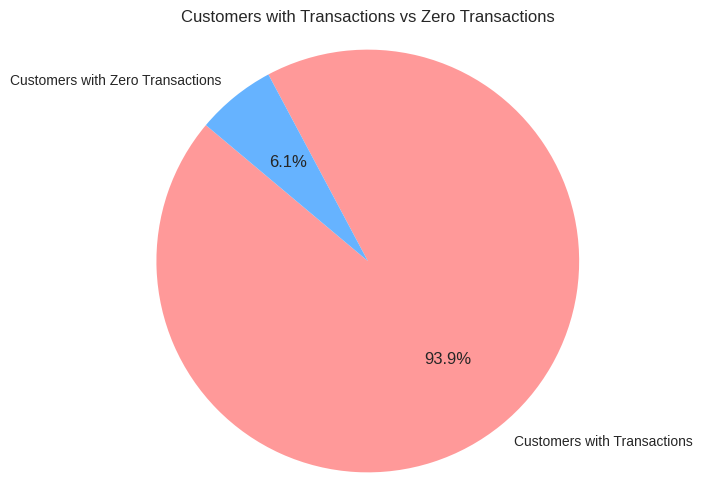

In [ ]:
# Filter customers with zero transactions
zero_transaction_customers = cc_performance_nosales[cc_performance_nosales['total_sales'] == 0]

# Count the number of zero transaction customers
zero_transaction_count = len(zero_transaction_customers)

# Count the number of customers
total_customers = len(cc_performance_nosales)

# Count the number of customers with transactions
non_zero_transaction_count = total_customers - zero_transaction_count

# Plotting the pie chart
labels = ['Customers with Transactions', 'Customers with Zero Transactions']
sizes = [non_zero_transaction_count, zero_transaction_count]
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Customers with Transactions vs Zero Transactions')
plt.show()

C. Investigating account activity levels by median months since last transaction

In [ ]:
cc_performance_activity_level_analysis = cc_performance_deletedrows.copy()
cc_performance_activity_level_analysis

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03,26
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24,51
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16,70
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07,25
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13,33
...,...,...,...,...,...,...,...,...,...,...,...,...
12482,101059900,Z,E,21,1,15000.0,1,15000.0,21,3,1970-05-27,52
12483,101059915,Z,E,19,0,20000.0,1,20000.0,19,4,1952-03-04,70
12484,101059935,Z,E,21,0,20000.0,1,20000.0,21,4,1981-10-23,41
12485,101059941,Z,E,17,0,20000.0,2,20000.0,17,6,1975-07-21,47


In [ ]:
median_months = cc_performance_activity_level_analysis.groupby('account_activity_level')['month_since_last_sales'].median().reset_index()
most_active_level = median_months.loc[median_months['month_since_last_sales'].idxmin(), 'account_activity_level']
most_active_level

'Y'

In [ ]:
median_months_by_level = cc_performance_activity_level_analysis.groupby('account_activity_level')['month_since_last_sales'].median().sort_values()
median_months_table = median_months_by_level.to_frame(name = 'median_months_since_last_transaction')
print (median_months_table)

                        median_months_since_last_transaction
account_activity_level                                      
Y                                                       17.0
X                                                       18.0
Z                                                       18.0


It is found that Y is the most active level by median months since last transaction, not X

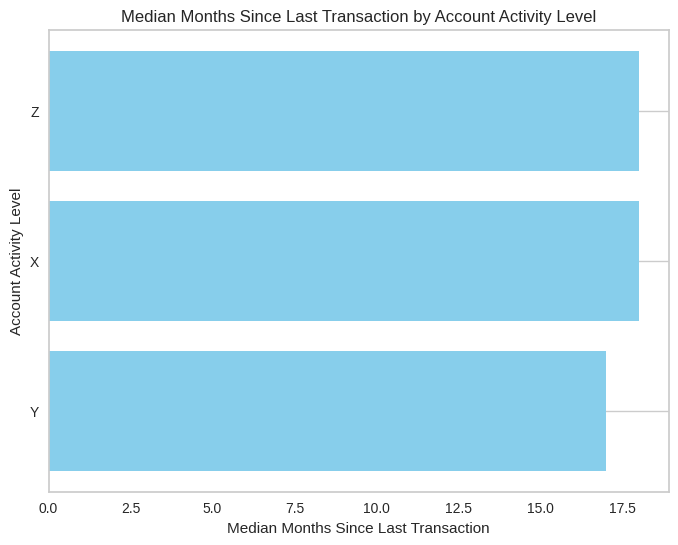

In [ ]:
plt.figure(figsize=(8, 6))
plt.barh(median_months_table.index, median_months_table['median_months_since_last_transaction'], color='skyblue')
plt.title('Median Months Since Last Transaction by Account Activity Level')
plt.xlabel('Median Months Since Last Transaction')
plt.ylabel('Account Activity Level')
plt.grid(axis='x')
plt.show()

D. Sales by gender aggregation, is it true that males provide more profit to the company ?

In [ ]:
cc_performance_gender_agg = cc_performance_totalsales.copy()
cc_performance_gender_agg

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age,total_sales
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03,26,25000.0
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24,51,45000.0
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16,70,103980.0
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07,25,154980.0
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13,33,75000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12482,101059900,Z,E,21,1,15000.0,1,15000.0,21,3,1970-05-27,52,15000.0
12483,101059915,Z,E,19,0,20000.0,1,20000.0,19,4,1952-03-04,70,20000.0
12484,101059935,Z,E,21,0,20000.0,1,20000.0,21,4,1981-10-23,41,20000.0
12485,101059941,Z,E,17,0,20000.0,2,20000.0,17,6,1975-07-21,47,40000.0


In [ ]:
gender_sales_stats = cc_performance_gender_agg.groupby('flag_female')['total_sales'].describe()
gender_sales_stats

,count,mean,std,min,25%,50%,75%,max
flag_female,,,,,,,,
0,5335.0,34946.328022,20753.658365,0.0,20000.0,30000.0,45000.0,225000.0
1,6293.0,34332.887335,19584.114158,-1000.0,20000.0,30000.0,43000.0,244400.0


<ipython-input-422-51e4e862e475>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='flag_female', y='total_sales', data=cc_performance_gender_agg, palette='Set2')


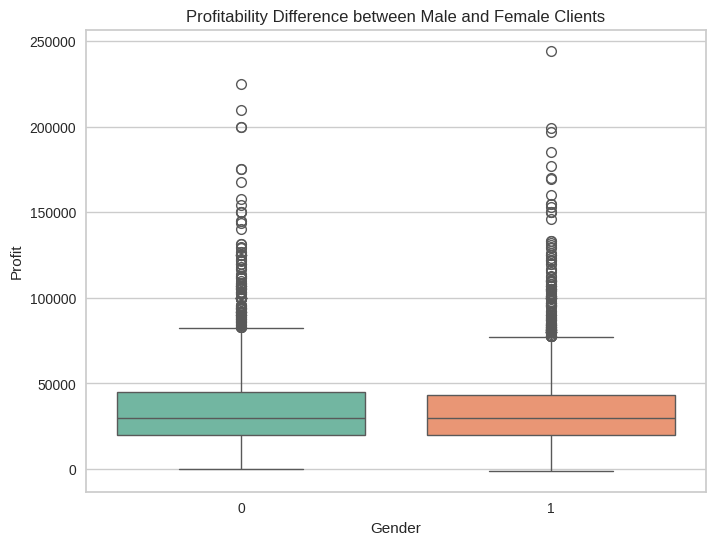

              count          mean           std     min      25%      50%  \
flag_female                                                                 
0            5335.0  34946.328022  20753.658365     0.0  20000.0  30000.0   
1            6293.0  34332.887335  19584.114158 -1000.0  20000.0  30000.0   

                 75%       max  
flag_female                     
0            45000.0  225000.0  
1            43000.0  244400.0  


In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='flag_female', y='total_sales', data=cc_performance_gender_agg, palette='Set2')
plt.title('Profitability Difference between Male and Female Clients')
plt.xlabel('Gender')
plt.ylabel('Profit')
plt.show()

print(gender_sales_stats)

In [ ]:
gender_sales_stats_sum_only = cc_performance_gender_agg.groupby('flag_female')['total_sales'].sum().to_frame(name = 'total_sales_sum')
gender_sales_stats_sum_only['total_sales_sum'] = gender_sales_stats_sum_only['total_sales_sum'].apply(lambda x: '{:,.0f}'.format(x))
gender_sales_stats_sum_only

,total_sales_sum
flag_female,
0,"186,438,660"
1,"216,056,860"


From the data dictionary, 0 means males and 1 mean female, from the sum of total sales alone, we can conclude that female provides more profitability to the credit card performance

**Insights & Recommendations**

A. Generation Segmentation

In [ ]:
cc_performance_generation_segmentation = cc_performance_totalsales.copy()
cc_performance_generation_segmentation

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age,total_sales
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03,26,25000.0
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24,51,45000.0
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16,70,103980.0
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07,25,154980.0
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13,33,75000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12482,101059900,Z,E,21,1,15000.0,1,15000.0,21,3,1970-05-27,52,15000.0
12483,101059915,Z,E,19,0,20000.0,1,20000.0,19,4,1952-03-04,70,20000.0
12484,101059935,Z,E,21,0,20000.0,1,20000.0,21,4,1981-10-23,41,20000.0
12485,101059941,Z,E,17,0,20000.0,2,20000.0,17,6,1975-07-21,47,40000.0


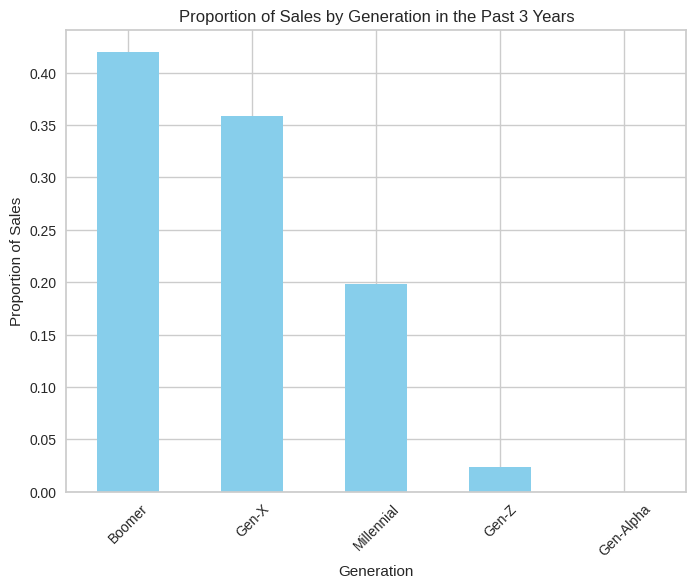

generation
Boomer        0.419900
Gen-X         0.358686
Millennial    0.198037
Gen-Z         0.023377
Gen-Alpha     0.000000
Name: total_sales, dtype: float64


In [ ]:
# Calculate the year of birth
cc_performance_generation_segmentation['year_of_birth'] = cc_performance_generation_segmentation['birth_date'].dt.year

# Define the bins for different generations
bins = [1946, 1964, 1980, 1996, 2012,2023]
labels = ['Boomer', 'Gen-X', 'Millennial', 'Gen-Z', 'Gen-Alpha']

# Categorize years into generations
cc_performance_generation_segmentation['generation'] = pd.cut(cc_performance_generation_segmentation['year_of_birth'], bins=bins, labels=labels, right=False)

# Calculate total sales for each generation
generation_sales = cc_performance_generation_segmentation.groupby('generation')['total_sales'].sum()

# Calculate proportion of sales for each generation
proportion_sales = generation_sales / generation_sales.sum()

# Plotting the proportion of sales for each generation
plt.figure(figsize=(8, 6))
proportion_sales.plot(kind='bar', color='skyblue')
plt.title('Proportion of Sales by Generation in the Past 3 Years')
plt.xlabel('Generation')
plt.ylabel('Proportion of Sales')
plt.xticks(rotation=45)
plt.show()

print(proportion_sales)

B. Promos Effect to Sales

In [ ]:
cc_performance_promos_effect = cc_performance_totalsales.copy()
cc_performance_promos_effect

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age,total_sales
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03,26,25000.0
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24,51,45000.0
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16,70,103980.0
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07,25,154980.0
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13,33,75000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12482,101059900,Z,E,21,1,15000.0,1,15000.0,21,3,1970-05-27,52,15000.0
12483,101059915,Z,E,19,0,20000.0,1,20000.0,19,4,1952-03-04,70,20000.0
12484,101059935,Z,E,21,0,20000.0,1,20000.0,21,4,1981-10-23,41,20000.0
12485,101059941,Z,E,17,0,20000.0,2,20000.0,17,6,1975-07-21,47,40000.0


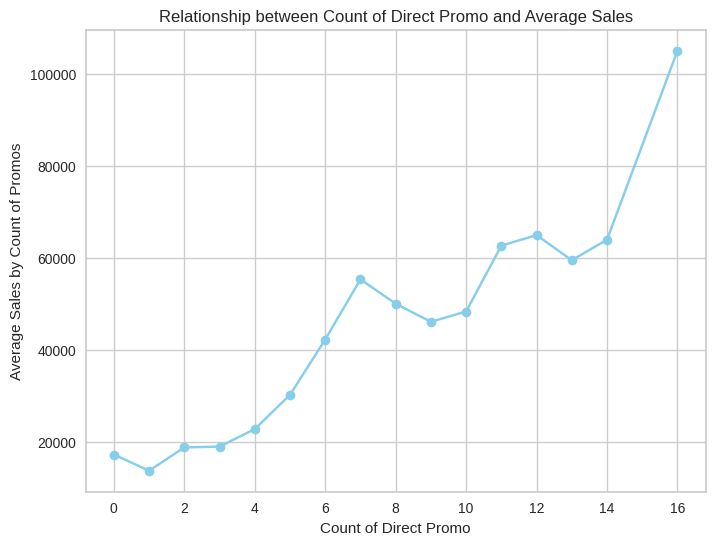

    count_direct_promo_L12M  average_of_total_sales
0                         0            17333.333333
1                         1            13810.666667
2                         2            18877.750000
3                         3            19049.965870
4                         4            22848.509154
5                         5            30282.095142
6                         6            42304.825442
7                         7            55388.550420
8                         8            50098.235294
9                         9            46157.777778
10                       10            48397.500000
11                       11            62705.882353
12                       12            64991.428571
13                       13            59542.500000
14                       14            64000.000000
15                       16           105050.000000


In [ ]:
# Group by count of direct promo and calculate the average sales per customer in each group
cc_performance_promos_effect = cc_performance_promos_effect.groupby('count_direct_promo_L12M')['total_sales'].mean().reset_index()
cc_performance_promos_effect.rename(columns={'total_sales': 'average_of_total_sales'}, inplace=True)
cc_performance_promos_effect

# Plotting the relationship between count of direct promo and average sales per customer
plt.figure(figsize=(8, 6))
plt.plot(cc_performance_promos_effect['count_direct_promo_L12M'], cc_performance_promos_effect['average_of_total_sales'], marker='o', color='skyblue', linestyle='-')
plt.title('Relationship between Count of Direct Promo and Average Sales')
plt.xlabel('Count of Direct Promo')
plt.ylabel('Average Sales by Count of Promos')
plt.grid(True)
plt.show()

print(cc_performance_promos_effect)

Even thought more promos does not necessarily mean higher sales, the trendline shows positive proportional change of sales. Therefore raising the number of direct promos is still recommended.

#MILESTONE 2

In [ ]:
kmeans_analysis = cc_performance_totalsales.copy()
kmeans_analysis

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age,total_sales
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03,26,25000.0
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24,51,45000.0
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16,70,103980.0
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07,25,154980.0
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13,33,75000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12482,101059900,Z,E,21,1,15000.0,1,15000.0,21,3,1970-05-27,52,15000.0
12483,101059915,Z,E,19,0,20000.0,1,20000.0,19,4,1952-03-04,70,20000.0
12484,101059935,Z,E,21,0,20000.0,1,20000.0,21,4,1981-10-23,41,20000.0
12485,101059941,Z,E,17,0,20000.0,2,20000.0,17,6,1975-07-21,47,40000.0


In [ ]:
kmeans_analysis[['total_sales']] = kmeans_analysis[['total_sales']].astype(float)
kmeans_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11628 entries, 0 to 12486
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               11628 non-null  object        
 1   account_activity_level   11628 non-null  object        
 2   customer_value_level     11628 non-null  object        
 3   MOB                      11628 non-null  int64         
 4   flag_female              11628 non-null  int64         
 5   avg_sales_L36M           11628 non-null  float64       
 6   cnt_sales_L36M           11628 non-null  int64         
 7   last_sales               11628 non-null  float64       
 8   month_since_last_sales   11628 non-null  int64         
 9   count_direct_promo_L12M  11628 non-null  int64         
 10  birth_date               11628 non-null  datetime64[ns]
 11  client_age               11628 non-null  int64         
 12  total_sales              11628 n

In [ ]:
kmeans_analysis = kmeans_analysis[['account_id','MOB','avg_sales_L36M','cnt_sales_L36M','client_age','total_sales']].copy()
kmeans_analysis

,account_id,MOB,avg_sales_L36M,cnt_sales_L36M,client_age,total_sales
0,100000006,91,25000.0,1,26,25000.0
1,100000038,69,9000.0,5,51,45000.0
2,100000382,123,17330.0,6,70,103980.0
3,100000612,84,25830.0,6,25,154980.0
4,100000757,40,25000.0,3,33,75000.0
...,...,...,...,...,...,...
12482,101059900,21,15000.0,1,52,15000.0
12483,101059915,19,20000.0,1,70,20000.0
12484,101059935,21,20000.0,1,41,20000.0
12485,101059941,17,20000.0,2,47,40000.0


In [ ]:
kmeans_analysis = kmeans_analysis.set_index('account_id')
kmeans_analysis

,MOB,avg_sales_L36M,cnt_sales_L36M,client_age,total_sales
account_id,,,,,
100000006,91,25000.0,1,26,25000.0
100000038,69,9000.0,5,51,45000.0
100000382,123,17330.0,6,70,103980.0
100000612,84,25830.0,6,25,154980.0
100000757,40,25000.0,3,33,75000.0
...,...,...,...,...,...
101059900,21,15000.0,1,52,15000.0
101059915,19,20000.0,1,70,20000.0
101059935,21,20000.0,1,41,20000.0


In [ ]:
rs = RobustScaler()
rs_result = rs.fit_transform(kmeans_analysis)
rs_result

array([[ 0.48101266,  1.        , -0.33333333, -1.22222222, -0.21052632],
       [ 0.20253165, -0.6       ,  1.        , -0.2962963 ,  0.63157895],
       [ 0.88607595,  0.233     ,  1.33333333,  0.40740741,  3.11494737],
       ...,
       [-0.40506329,  0.5       , -0.33333333, -0.66666667, -0.42105263],
       [-0.4556962 ,  0.5       ,  0.        , -0.44444444,  0.42105263],
       [-0.40506329,  0.5       ,  0.        , -0.44444444,  0.42105263]])

In [ ]:
kmeans_robustscaled = pd.DataFrame(rs_result, columns = kmeans_analysis.columns)
kmeans_robustscaled

,MOB,avg_sales_L36M,cnt_sales_L36M,client_age,total_sales
0,0.481013,1.000,-0.333333,-1.222222,-0.210526
1,0.202532,-0.600,1.000000,-0.296296,0.631579
2,0.886076,0.233,1.333333,0.407407,3.114947
3,0.392405,1.083,1.333333,-1.259259,5.262316
4,-0.164557,1.000,0.333333,-0.962963,1.894737
...,...,...,...,...,...
11623,-0.405063,0.000,-0.333333,-0.259259,-0.631579
11624,-0.430380,0.500,-0.333333,0.407407,-0.421053
11625,-0.405063,0.500,-0.333333,-0.666667,-0.421053
11626,-0.455696,0.500,0.000000,-0.444444,0.421053


In [ ]:
kmeans_robustscaled.describe()

,MOB,avg_sales_L36M,cnt_sales_L36M,client_age,total_sales
count,11628.000000,11628.000000,11628.000000,11628.000000,11628.000000
mean,0.130285,0.013374,0.272761,-0.009654,0.194288
std,0.518178,0.688942,0.681152,0.597508,0.847604
min,-0.481013,-1.600000,-0.333333,-1.407407,-1.305263
25%,-0.367089,-0.500000,-0.333333,-0.481481,-0.421053
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.632911,0.500000,0.666667,0.518519,0.578947
max,6.556962,18.500000,4.333333,1.074074,9.027368


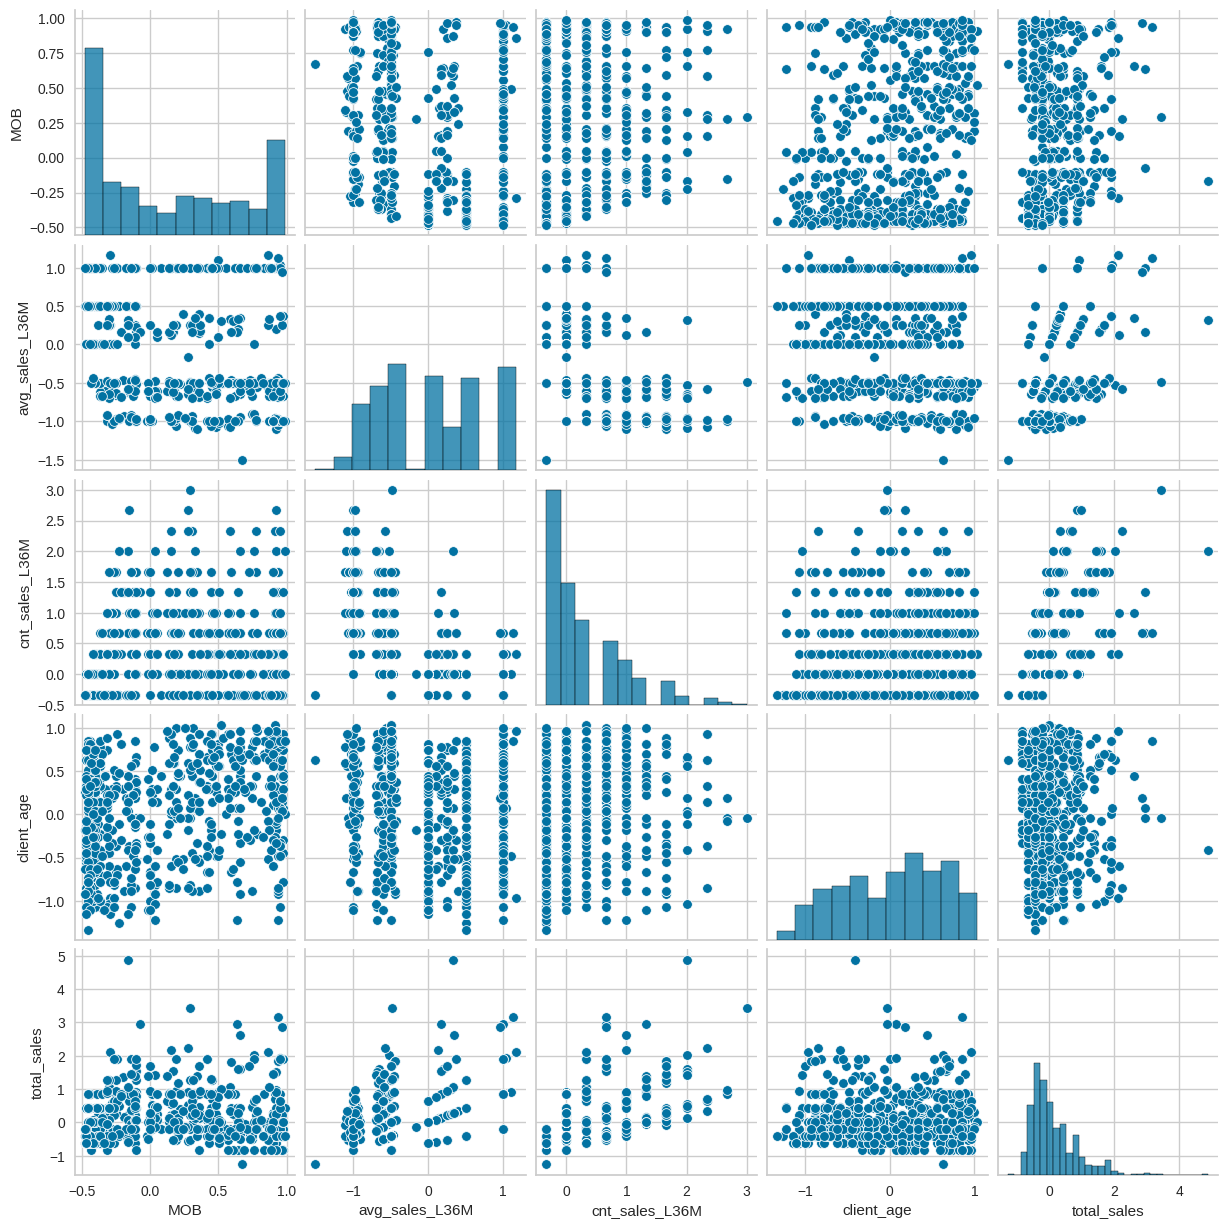

In [ ]:
sns.pairplot(kmeans_robustscaled.sample(frac=0.05))

#K means clustering : initial approach

In [ ]:
kmeans_robustscaled.head()

,MOB,avg_sales_L36M,cnt_sales_L36M,client_age,total_sales
0,0.481013,1.000,-0.333333,-1.222222,-0.210526
1,0.202532,-0.600,1.000000,-0.296296,0.631579
2,0.886076,0.233,1.333333,0.407407,3.114947
3,0.392405,1.083,1.333333,-1.259259,5.262316
4,-0.164557,1.000,0.333333,-0.962963,1.894737


#Determining numbers of clusters

In [ ]:
kmeans_clustermodel = kmeans_robustscaled.copy()
kmeans_clustermodel

,MOB,avg_sales_L36M,cnt_sales_L36M,client_age,total_sales
0,0.481013,1.000,-0.333333,-1.222222,-0.210526
1,0.202532,-0.600,1.000000,-0.296296,0.631579
2,0.886076,0.233,1.333333,0.407407,3.114947
3,0.392405,1.083,1.333333,-1.259259,5.262316
4,-0.164557,1.000,0.333333,-0.962963,1.894737
...,...,...,...,...,...
11623,-0.405063,0.000,-0.333333,-0.259259,-0.631579
11624,-0.430380,0.500,-0.333333,0.407407,-0.421053
11625,-0.405063,0.500,-0.333333,-0.666667,-0.421053
11626,-0.455696,0.500,0.000000,-0.444444,0.421053


In [ ]:
# For each n_clusters between 1 and 11, we calculate the distortion value. So we use "for" iteration

# Create list kosong yang akan kita pakai untuk menampung distortion value tiap iterasi
distortions = []

K = range(1,15)
for n_clusters in K:
  # Buat modelnya
  kmeanModel = KMeans(n_clusters, random_state=1000, n_init='auto')
  # Train di model kita
  kmeanModel.fit(kmeans_clustermodel)
  # Ambil distortion value pakai ".inertia_" lalu diappend ke list kosong tadi
  distortions.append(kmeanModel.inertia_)

# Print output
distortions

[26539.389337437737,
 18726.639373624,
 14589.317355955298,
 12742.298077642932,
 10901.841866143657,
 10090.407909072903,
 8966.118089086329,
 8361.503518952162,
 7823.135364483633,
 7417.836683725514,
 7144.444084736334,
 6888.346527009255,
 6724.8558590161,
 6291.803126395314]

<Figure size 1600x800 with 0 Axes>

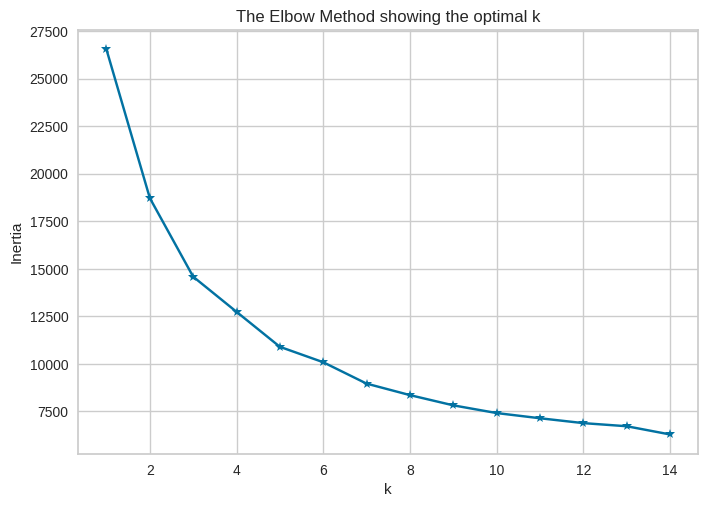

In [ ]:
plt.figure(figsize=(16,8))
plt.figure()
plt.plot(K, distortions, 'b*-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Kesimpulan : ...

#Silhouette Method

For k=2, the average silhouette score is 0.29666015869988355
For k=3, the average silhouette score is 0.30578213785667163
For k=4, the average silhouette score is 0.2852636153601918
For k=5, the average silhouette score is 0.2944703768977993
For k=6, the average silhouette score is 0.28835412152965945
For k=7, the average silhouette score is 0.26157536279904914
For k=8, the average silhouette score is 0.25768754038396474
For k=9, the average silhouette score is 0.2607877211636388
For k=10, the average silhouette score is 0.25128039248682427
For k=11, the average silhouette score is 0.24722063194133723
For k=12, the average silhouette score is 0.23535110505020362
For k=13, the average silhouette score is 0.23553766167572285
For k=14, the average silhouette score is 0.24505934202452465


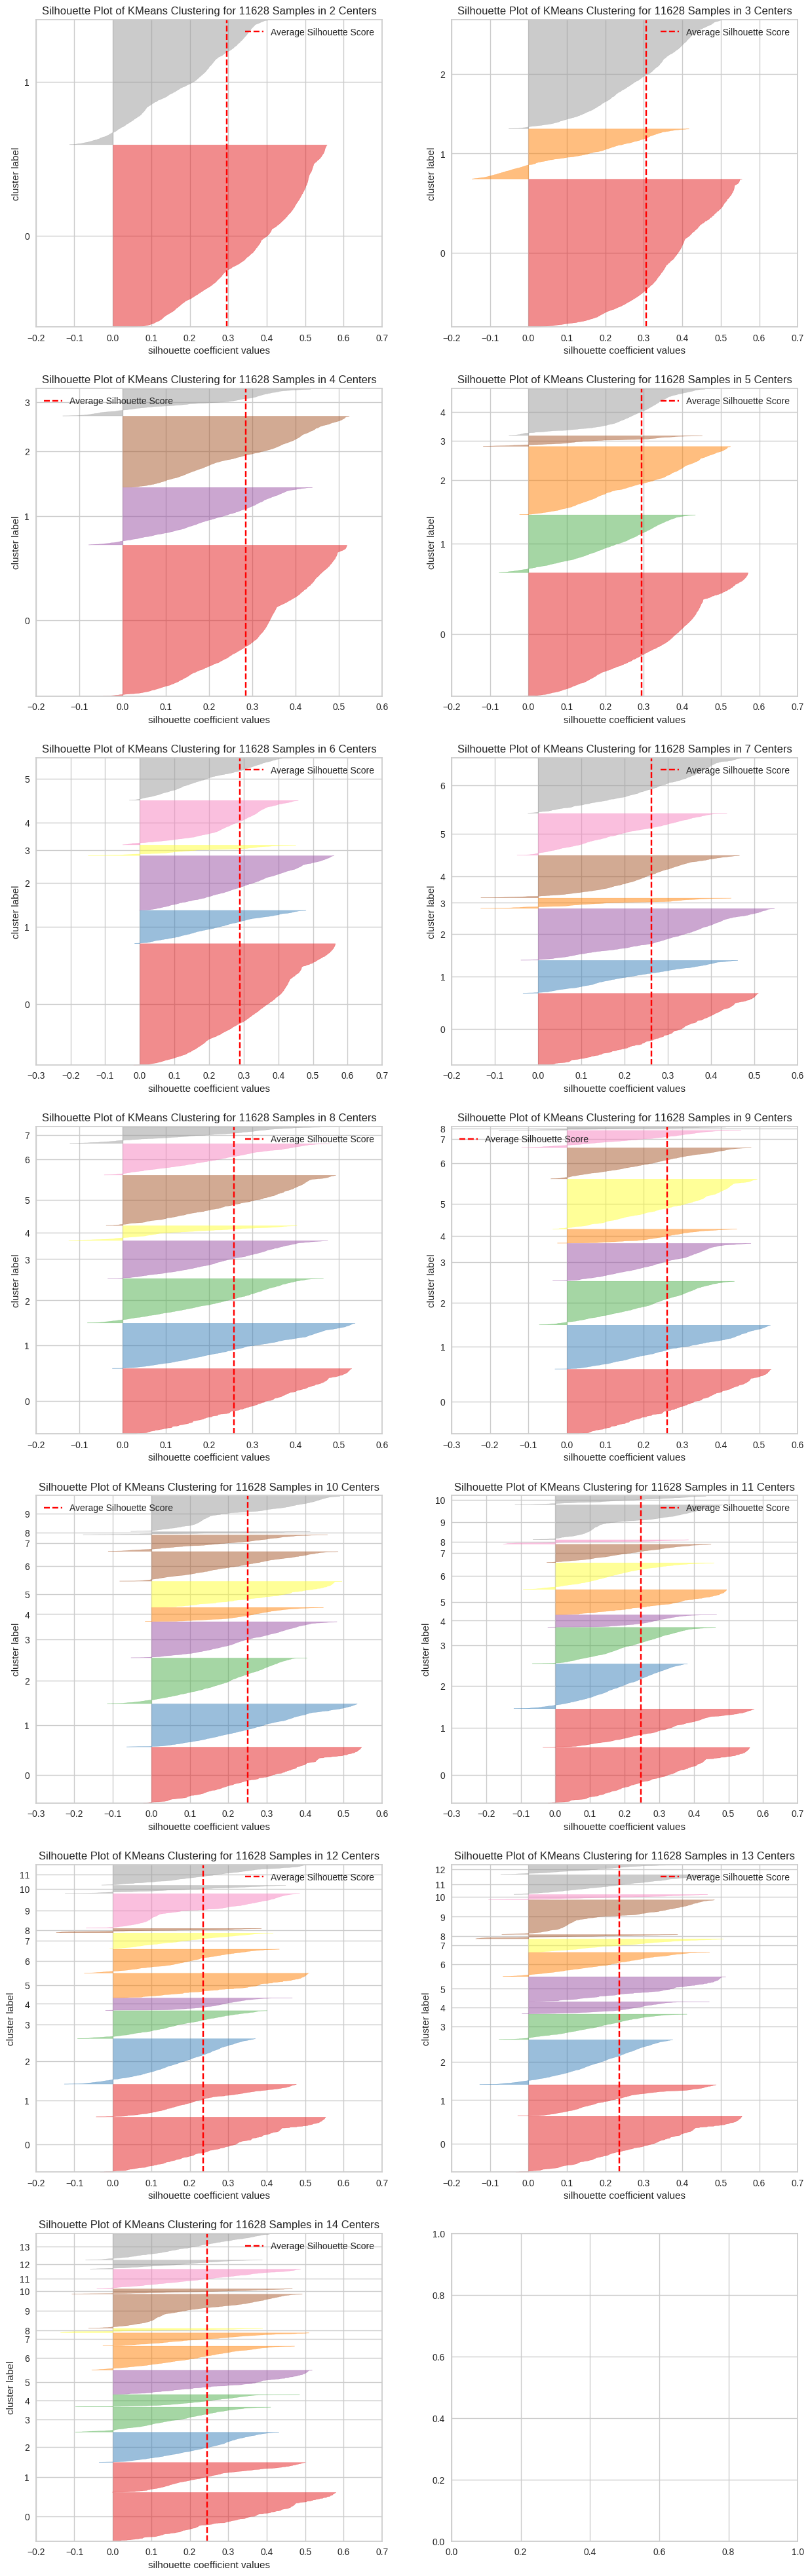

In [ ]:
K = range(2,15)
banyak_K = len(K)
n_baris = int(np.ceil(banyak_K/2))

fig, axes = plt.subplots(n_baris, 2, figsize=(15,50))

for i, n_clusters in enumerate(K):
  kmeanModel = KMeans(n_clusters, random_state = 1000, n_init='auto')

  sil = SilhouetteVisualizer(kmeanModel, is_fitted=False, ax=axes.flatten()[i])
  sil.fit(kmeans_clustermodel)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

#Interpreting The Cluster

In [ ]:
kmeans_interpret = kmeans_clustermodel.copy()
kmeans_interpret

,MOB,avg_sales_L36M,cnt_sales_L36M,client_age,total_sales
0,0.481013,1.000,-0.333333,-1.222222,-0.210526
1,0.202532,-0.600,1.000000,-0.296296,0.631579
2,0.886076,0.233,1.333333,0.407407,3.114947
3,0.392405,1.083,1.333333,-1.259259,5.262316
4,-0.164557,1.000,0.333333,-0.962963,1.894737
...,...,...,...,...,...
11623,-0.405063,0.000,-0.333333,-0.259259,-0.631579
11624,-0.430380,0.500,-0.333333,0.407407,-0.421053
11625,-0.405063,0.500,-0.333333,-0.666667,-0.421053
11626,-0.455696,0.500,0.000000,-0.444444,0.421053


In [ ]:
cluster_model = KMeans(n_clusters = 4, random_state = 1000, n_init='auto')
cluster_model

KMeans(n_clusters=4, n_init='auto', random_state=1000)

In [ ]:
cluster_model.fit(kmeans_interpret)

KMeans(n_clusters=4, n_init='auto', random_state=1000)

In [ ]:
cluster_model.labels_

array([0, 1, 3, ..., 0, 0, 0], dtype=int32)

In [ ]:
# Hence, we can add the cluster produced by model to a new column in our original dataframe
kmeans_clusters = kmeans_analysis.copy()
kmeans_clusters['cluster'] = cluster_model.labels_
kmeans_clusters

,MOB,avg_sales_L36M,cnt_sales_L36M,client_age,total_sales,cluster
account_id,,,,,,
100000006,91,25000.0,1,26,25000.0,0
100000038,69,9000.0,5,51,45000.0,1
100000382,123,17330.0,6,70,103980.0,3
100000612,84,25830.0,6,25,154980.0,3
100000757,40,25000.0,3,33,75000.0,3
...,...,...,...,...,...,...
101059900,21,15000.0,1,52,15000.0,0
101059915,19,20000.0,1,70,20000.0,0
101059935,21,20000.0,1,41,20000.0,0


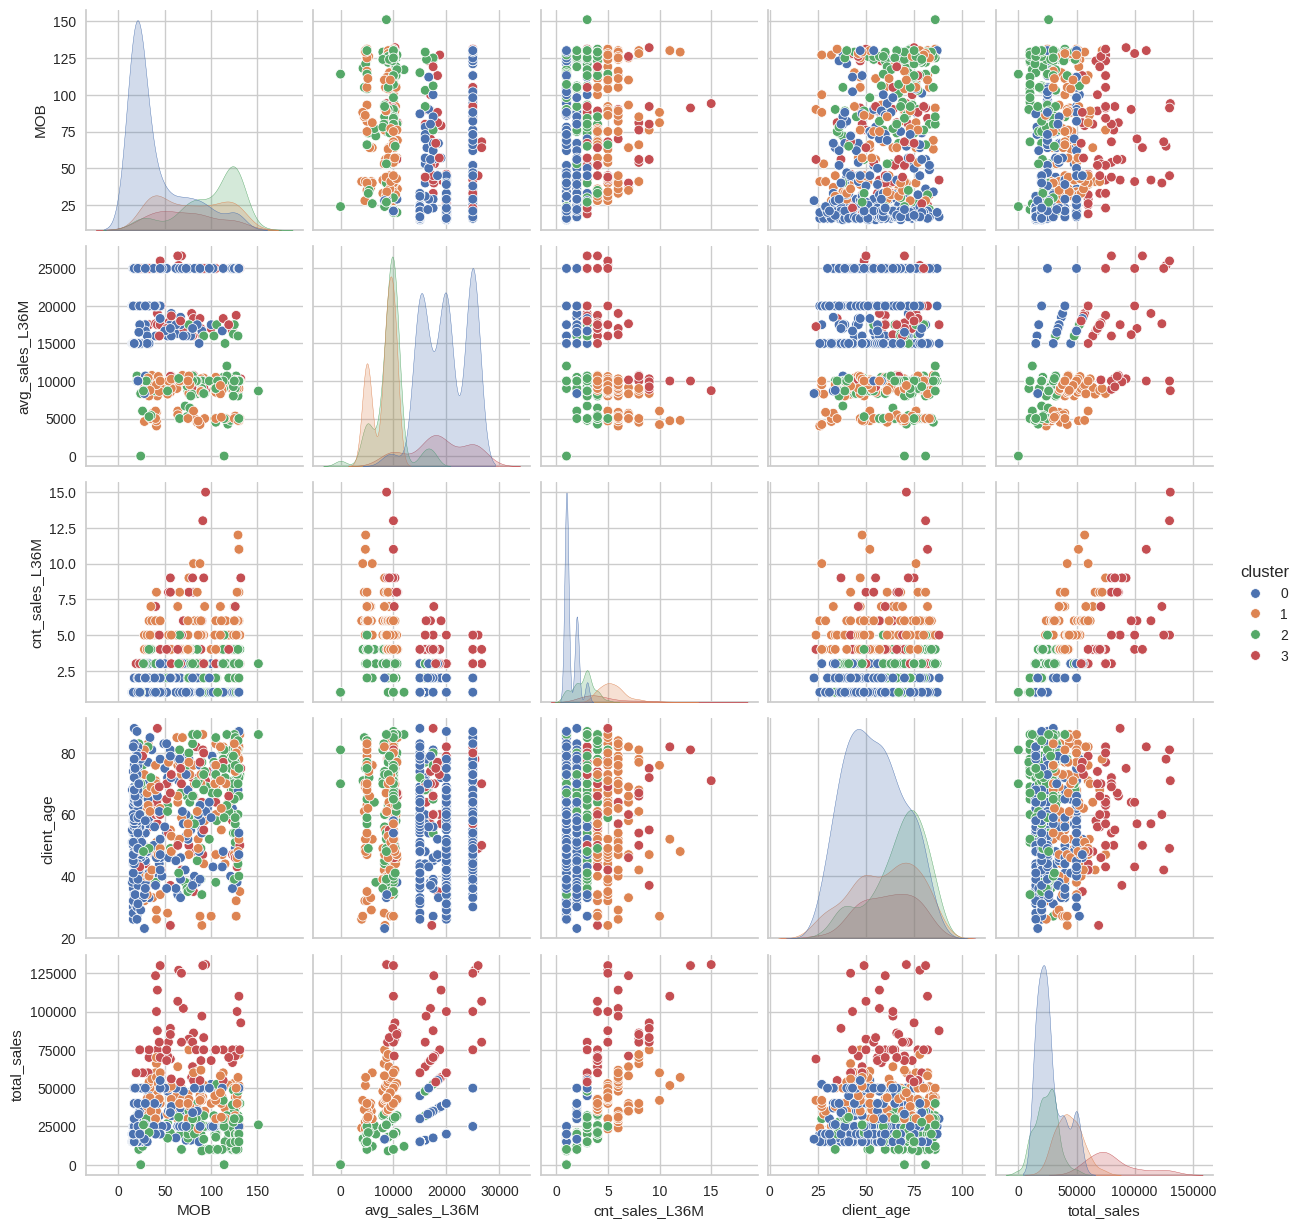

In [ ]:
# Let's re-look into data after clustering
# Pilihan palet warna: https://www.practicalpythonfordatascience.com/ap_seaborn_palette
sns.pairplot(kmeans_clusters.sample(frac=0.05), hue='cluster', palette='deep')

In [ ]:
kmeans_clusters.groupby('cluster').agg({
    'MOB' : ['count','mean'],
    'client_age' : 'median',
    'avg_sales_L36M' : 'sum',
    'cnt_sales_L36M' : 'mean',
    'total_sales' : 'mean'
    })

MOB             client_age avg_sales_L36M cnt_sales_L36M  \
        count        mean     median            sum           mean   
cluster                                                              
0        5731   38.896179       53.0    113866130.0       1.442680   
1        2179   72.669114       60.0     17199980.0       5.729693   
2        2699  103.182290       71.0     25358670.0       2.696554   
3        1019   74.794897       59.0     19550300.0       4.651619   

          total_sales  
                 mean  
cluster                
0        28188.291747  
1        43264.979348  
2        24120.726195  
3        80051.216879

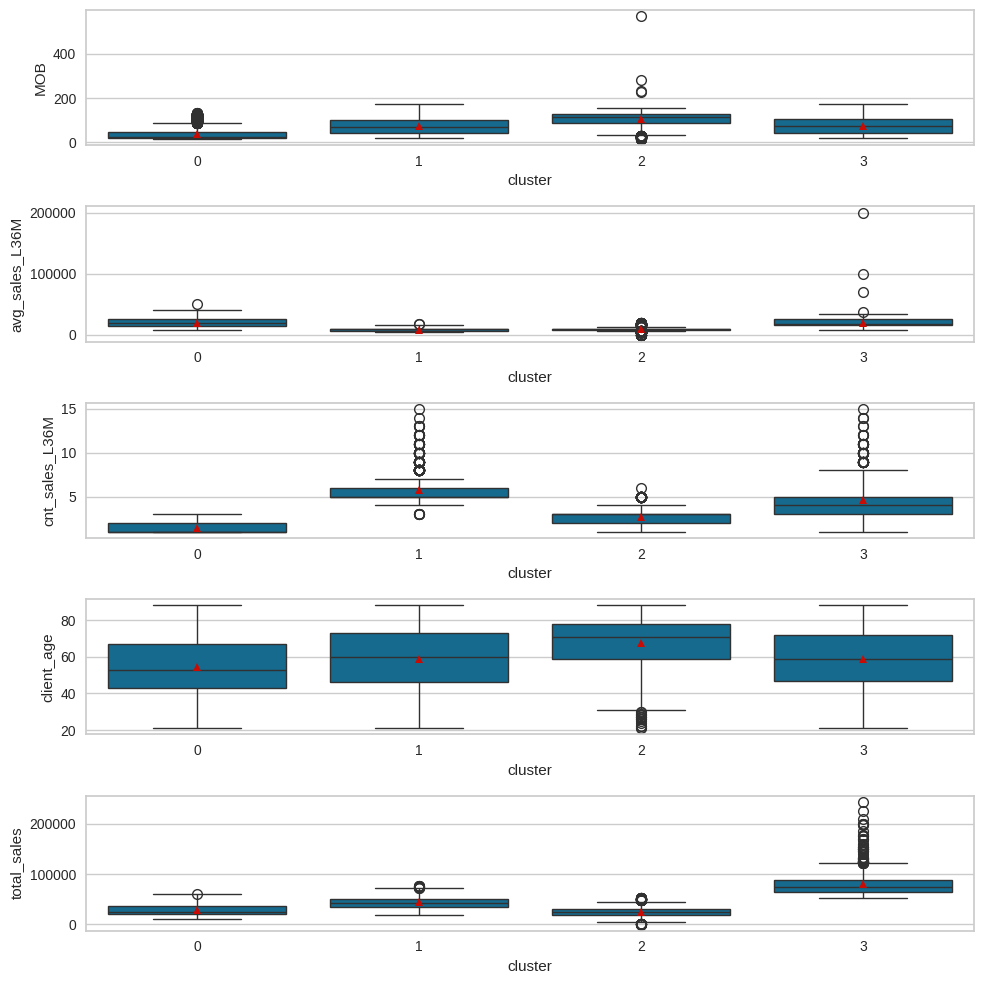

In [ ]:
# Bisa juga melakukan boxplot

# Ambil banyak kolom dari data kita
n_baris = len(kmeans_analysis.columns)

# Buat canvas subplot dengan 1 kolom dan N baris sebanyak kolom numerik
fig, axes = plt.subplots(n_baris, 1, figsize=(10,10))

for i, nama_kol in enumerate(kmeans_analysis.columns):
  # Show boxplot bisa pakai library Seaborn, pilih datanya, x-axis, y-axis, axes, dan showmeans kalo mau show meannya
  sns.boxplot(kmeans_clusters, x='cluster', y=nama_kol, ax=axes.flatten()[i], showmeans=True)

plt.tight_layout()
plt.show()

In [ ]:
df_mergedfinal = kmeans_clusters.merge(cc_performance_totalsales,how='inner', left_index = True, right_on='account_id')
df_mergedfinal

,MOB_x,avg_sales_L36M_x,cnt_sales_L36M_x,client_age_x,total_sales_x,cluster,account_id,account_activity_level,customer_value_level,MOB_y,flag_female,avg_sales_L36M_y,cnt_sales_L36M_y,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age_y,total_sales_y
0,91,25000.0,1,26,25000.0,0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03,26,25000.0
1,69,9000.0,5,51,45000.0,1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24,51,45000.0
2,123,17330.0,6,70,103980.0,3,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16,70,103980.0
3,84,25830.0,6,25,154980.0,3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07,25,154980.0
4,40,25000.0,3,33,75000.0,3,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13,33,75000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12482,21,15000.0,1,52,15000.0,0,101059900,Z,E,21,1,15000.0,1,15000.0,21,3,1970-05-27,52,15000.0
12483,19,20000.0,1,70,20000.0,0,101059915,Z,E,19,0,20000.0,1,20000.0,19,4,1952-03-04,70,20000.0
12484,21,20000.0,1,41,20000.0,0,101059935,Z,E,21,0,20000.0,1,20000.0,21,4,1981-10-23,41,20000.0
12485,17,20000.0,2,47,40000.0,0,101059941,Z,E,17,0,20000.0,2,20000.0,17,6,1975-07-21,47,40000.0


#Break Down The Number of Cluster Interpretation

In [ ]:
df_mergedfinal.groupby(['cluster'], as_index = False)['MOB_x'].median()

,cluster,MOB_x
0,0,24.0
1,1,67.0
2,2,114.0
3,3,74.0



*   Cluster 0 : new customers
*   Cluster 1 : existing customers
*   Cluster 2 : loyal customers
*   Cluster 3 : existing customers

In [ ]:
df_mergedfinal.groupby(['cluster'], as_index = False)['avg_sales_L36M_x'].sum()

,cluster,avg_sales_L36M_x
0,0,113866130.0
1,1,17199980.0
2,2,25358670.0
3,3,19550300.0


*   Cluster 0 : high average sales
*   Cluster 1 : low average sales
*   Cluster 2 : medium average sales
*   Cluster 3 : medium average sales

In [ ]:
df_mergedfinal.groupby(['cluster'], as_index = False)['cnt_sales_L36M_x'].mean()

,cluster,cnt_sales_L36M_x
0,0,1.442680
1,1,5.729693
2,2,2.696554
3,3,4.651619


*   Cluster 0 : low transaction
*   Cluster 1 : high transaction
*   Cluster 2 : medium transaction
*   Cluster 3 : high transaction

In [ ]:
df_mergedfinal.groupby(['cluster'], as_index = False)['client_age_x'].median()

,cluster,client_age_x
0,0,53.0
1,1,60.0
2,2,71.0
3,3,59.0


*   Cluster 0 : youngest
*   Cluster 1 : mid
*   Cluster 2 : oldest
*   Cluster 3 : mid

In [ ]:
df_mergedfinal.groupby(['cluster'], as_index = False)['total_sales_x'].mean()

,cluster,total_sales_x
0,0,28188.291747
1,1,43264.979348
2,2,24120.726195
3,3,80051.216879


*   Cluster 0 : low total sales
*   Cluster 1 : medium total sales
*   Cluster 2 : low total sales
*   Cluster 3 : high total sales

#SUMMARY OF CUSTOMER CLUSTERING


*   Cluster 0 : young & new customers, with low total sales,high average sales per customer, but low transaction  
*   Cluster 1 : existing customers, with medium total sales, low average sales per customer, but surprisingly high transaction
*   Cluster 2 :oldest customers (loyalty indicator), with lowest total sales,  high average sales per customer, but low on transaction
*   Cluster 3 : existing customers, with highest total sales, medium average sales per customer, and high transaction


#Business recommendations to be given :

*   Cluster 0 :
Implement a **loyalty program** that rewards customers for frequent purchases. Offer incentives such as discounts, freebies, or exclusive access to new products or events. This can encourage repeat purchases and increase transaction frequency.

*   Cluster 1 : **Incentivize Spending Tiers**: Implement a rewards program that offers increasingly valuable benefits as customers reach higher spending tiers. Encourage customers to consolidate their smaller transactions into larger purchases by providing enhanced rewards or perks for reaching specific spending thresholds.
Other way is **Offer Cashback or Rewards on Larger Purchases**: Provide higher
cashback percentages or more lucrative rewards for larger transactions. This can incentivize customers to use their credit cards for bigger purchases, thereby increasing the average sales value per transaction.

*   Cluster 2 : **Reactivation Campaigns**: Launch reactivation campaigns specifically targeting inactive or low-transacting customers. Send targeted emails or direct mailings with exclusive offers or bonuses to incentivize them to start using their credit cards again. **Simplify Rewards Redemption Process**: Make it easy for customers to redeem their rewards and benefits earned through credit card usage. Streamline the redemption process and provide clear instructions on how to access and utilize their rewards, removing any barriers to frequent usage.

*   Cluster 3 : **Exclusive Rewards and Benefits**: Offer exclusive rewards, perks, and benefits tailored to the spending habits and preferences of high-value customers. This could include access to premium lounges at airports, concierge services, or higher cashback percentages on specific categories. **Personalized Service**: Provide personalized customer service to high-value customers, including dedicated account managers or priority customer support lines. Tailor communications and offers based on their individual preferences and past behavior to enhance their experience.




